In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [2]:
# 데이터 불러오기
df = pd.read_csv("data/고객db_확장본3.csv", index_col=0)

In [3]:
# 차량 구매 서비스 플랫폼 -> 회원 정보, 구매 정보 포함
df

,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path)
연번,,,,,,,,,,,,,,,,
1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,"35,170,000",신용카드,1,오프라인
2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,"85,790,000",신용카드,5,오프라인
3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,"69,500,000",계좌이체,1,오프라인
4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,"34,920,000",현금,1,오프라인
5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,"50,230,000",신용카드,1,오프라인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,신시우,1958-07-11,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,jihungim,2023-03-06,신규,준중형 세단,G80 (RG3),2024-12-20,"86,770,000",신용카드,2,온라인
289,최춘자,1976-06-27,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,jinho50,2024-08-26,신규,준대형 세단,Avante (CN7 N),2023-08-24,"69,510,000",현금,3,오프라인
290,차서준,1968-01-22,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,jihun41,2023-01-02,vip,준대형 세단,NEXO (FE),2024-01-12,"39,890,000",계좌이체,2,온라인


In [4]:
df = df.rename(columns={
    "이름 (Name)": "이름",
    "생년월일 (Date of Birth)": "생년월일",
    "성별 (Gender)": "성별",
    "이메일 (Email)": "이메일",
    "휴대폰번호 (Phone Number)": "휴대폰번호",
    "주소 (Address)": "주소",
    "아이디 (User ID)": "아이디",
    "가입일 (Registration Date)": "가입일",
    "고객 세그먼트 (Customer Segment)": "고객 세그먼트",
    "차량구분(vehicle types)": "차량구분",
    "구매한 제품 (Purchased Product)": "구매한 제품",
    "제품 구매 날짜 (Purchase Date)": "제품 구매 날짜",
    "거래 금액 (Transaction Amount)": "거래 금액",
    "거래 방식 (Transaction Method)": "거래 방식",
    "제품 구매 빈도 (Purchase Frequency)": "제품 구매 빈도",
    "제품 구매 경로 (Purchase Path)": "제품 구매 경로"
})

In [5]:
# 구매 금액 숫자로 변환
df["거래 금액"] = df["거래 금액"].str.replace(",", "").astype(int)

In [6]:
# 구매 당시 나이 계산
df["구매 당시 나이"] = df["제품 구매 날짜"].str.split("-").str.get(0).astype(int) - df["생년월일"].str.split("-").str.get(0).astype(int)

In [7]:
# 현재 나이 계산
df["현재 나이"] = 2025 - df["생년월일"].str.split("-").str.get(0).astype(int)

In [8]:
# 20대, 30대 등으로 연령대 나눈 컬럼
df["연령대"] = (df["현재 나이"] // 10 * 10).astype(str) + "대"

In [9]:
# 거주 지역 : 시 단위로 추출
df["거주 지역"] = df["주소"].str.split("시").str.get(0) + "시"

In [10]:
# 구매 날짜가 현재 이후인 데이터 삭제
df = df[df["제품 구매 날짜"] < "2025-03-20"]

In [11]:
# 마지막 구매 이후 소요 기간 컬럼 생성
df["마지막 구매 이후 소요 기간"] = (pd.to_datetime("2025-03-20") - pd.to_datetime(df["제품 구매 날짜"])).dt.days

In [12]:
# 구매 시점 컬럼 추가
def get_season(date):
    month = int(date.split("-")[1])
    if month in [1, 2, 3]:
        return "1분기"
    elif month in [4, 5, 6]:
        return "2분기"
    elif month in [7, 8, 9]:
        return "3분기"
    else:
        return "4분기"

df["구매 시점"] = df["제품 구매 날짜"].apply(get_season)

print(df[["제품 구매 날짜", "구매 시점"]].head())

      제품 구매 날짜 구매 시점
연번                  
1   2024-04-04   2분기
2   2025-02-10   1분기
3   2025-03-10   1분기
4   2023-05-01   2분기
5   2023-10-01   4분기


In [13]:
# 차량 구분 컬럼 명확하게 정리
vehicle_mapping = {
    "Avante (CN7 N)": "준중형 세단",
    "Avante (CN7 HEV)": "준중형 세단",
    "Grandeur (GN7 HEV)": "준대형 세단",
    "G80 (RG3)": "대형 세단",
    "Santa-Fe ™": "중형 SUV",
    "Santa-Fe (MX5 PHEV)": "중형 SUV",
    "Tucson (NX4 PHEV)": "준중형 SUV",
    "Palisade (LX2)": "준대형 SUV",
    "IONIQ (AE EV)": "준중형 해치백",
    "IONIQ 6 (CE)": "중형 세단",
    "NEXO (FE)": "중형 SUV",
    "G90 (HI)": "대형 세단",
    "G70 (IK)": "중형 세단",
    "i30 (PD)": "준중형 해치백",
    "GV80 (RS4)": "대형 SUV",
    "G90 (RS4)": "프리미엄 세단"
}

# 새로운 차량 구분 컬럼 추가
df["차량구분"] = df["구매한 제품"].map(vehicle_mapping)

In [14]:
# 연료 구분 컬럼 추가
car_fuel_mapping = {
    "Avante (CN7 N)": "휘발유",
    "Avante (CN7 HEV)": "하이브리드",
    "Grandeur (GN7 HEV)": "하이브리드",
    "G80 (RG3)": "휘발유",
    "Santa-Fe ™": "디젤",
    "Santa-Fe (MX5 PHEV)": "플러그인 하이브리드",
    "Tucson (NX4 PHEV)": "플러그인 하이브리드",
    "Palisade (LX2)": "디젤",
    "IONIQ (AE EV)": "전기",
    "IONIQ 6 (CE)": "전기",
    "NEXO (FE)": "수소",
    "G90 (HI)": "휘발유",
    "G70 (IK)": "휘발유",
    "i30 (PD)": "휘발유",
    "GV80 (RS4)": "디젤",
    "G90 (RS4)": "휘발유"
}

df["연료구분"] = df["구매한 제품"].map(car_fuel_mapping)

In [15]:
# 회원 세그먼트 컬럼 내용 변경
# VIP : 2회 이상 구매한 회원
# 일반 : 최근 6개월 이전 차량 구매한 회원
# 신규 : 최근 6개월 이내 차량 구매한 회원

def get_segment(date, count):
    if count >= 2:
        return "VIP"
    elif date >= "2024-09-20":
        return "신규"
    else:
        return "일반"

df["고객 세그먼트"] = df.apply(
    lambda row: get_segment(row["제품 구매 날짜"], row["제품 구매 빈도"]),
    axis=1
    )

In [16]:
# 컬럼별 데이터 타입 확인 -> object는 문자열, int64는 정수
# 거래 금액은 문자열에서 정수로 바꾸어줄 필요
df.dtypes

이름                 object
생년월일               object
성별                 object
휴대폰번호              object
이메일                object
주소                 object
아이디                object
가입일                object
고객 세그먼트            object
차량구분               object
구매한 제품             object
제품 구매 날짜           object
거래 금액               int64
거래 방식              object
제품 구매 빈도            int64
제품 구매 경로           object
구매 당시 나이            int64
현재 나이               int64
연령대                object
거주 지역              object
마지막 구매 이후 소요 기간     int64
구매 시점              object
연료구분               object
dtype: object

In [17]:
df.columns

Index(['이름', '생년월일', '성별', '휴대폰번호', '이메일', '주소', '아이디', '가입일', '고객 세그먼트',
       '차량구분', '구매한 제품', '제품 구매 날짜', '거래 금액', '거래 방식', '제품 구매 빈도', '제품 구매 경로',
       '구매 당시 나이', '현재 나이', '연령대', '거주 지역', '마지막 구매 이후 소요 기간', '구매 시점',
       '연료구분'],
      dtype='object')

In [18]:
df = df.loc[:, ['이름', '생년월일', '현재 나이', '연령대', '성별', '휴대폰번호', '이메일', '주소', '거주 지역', '아이디', '가입일', '고객 세그먼트',
       '차량구분', '구매한 제품', '연료구분', '제품 구매 날짜', '구매 시점', '구매 당시 나이', '거래 금액', '거래 방식', '제품 구매 빈도', '제품 구매 경로',
       '마지막 구매 이후 소요 기간']]

In [19]:
df

,이름,생년월일,현재 나이,연령대,성별,휴대폰번호,이메일,주소,거주 지역,아이디,...,구매한 제품,연료구분,제품 구매 날짜,구매 시점,구매 당시 나이,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,마지막 구매 이후 소요 기간
연번,,,,,,,,,,,,,,,,,,,,,
1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,인천광역시,14798,...,Avante (CN7 N),휘발유,2024-04-04,2분기,22,35170000,신용카드,1,오프라인,350
2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,광주광역시,kyoungsoo031,...,G80 (RG3),휘발유,2025-02-10,1분기,42,85790000,신용카드,5,오프라인,38
3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,부산광역시,daeun026,...,NEXO (FE),수소,2025-03-10,1분기,26,69500000,계좌이체,1,오프라인,10
4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,전라남도 목포시,minsu001,...,Santa-Fe ™,디젤,2023-05-01,2분기,63,34920000,현금,1,오프라인,689
5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,경기도 수원시,seunghyun020,...,G70 (IK),휘발유,2023-10-01,4분기,53,50230000,신용카드,1,오프라인,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,전라북도 전주시,jihungim,...,G80 (RG3),휘발유,2024-12-20,4분기,66,86770000,신용카드,2,온라인,90
289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,충청남도 천안시,jinho50,...,Avante (CN7 N),휘발유,2023-08-24,3분기,47,69510000,현금,3,오프라인,574
290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,경상남도 창원시,jihun41,...,NEXO (FE),수소,2024-01-12,1분기,56,39890000,계좌이체,2,온라인,433


In [20]:
df.to_csv("data/고객db_전처리.csv", index=False)

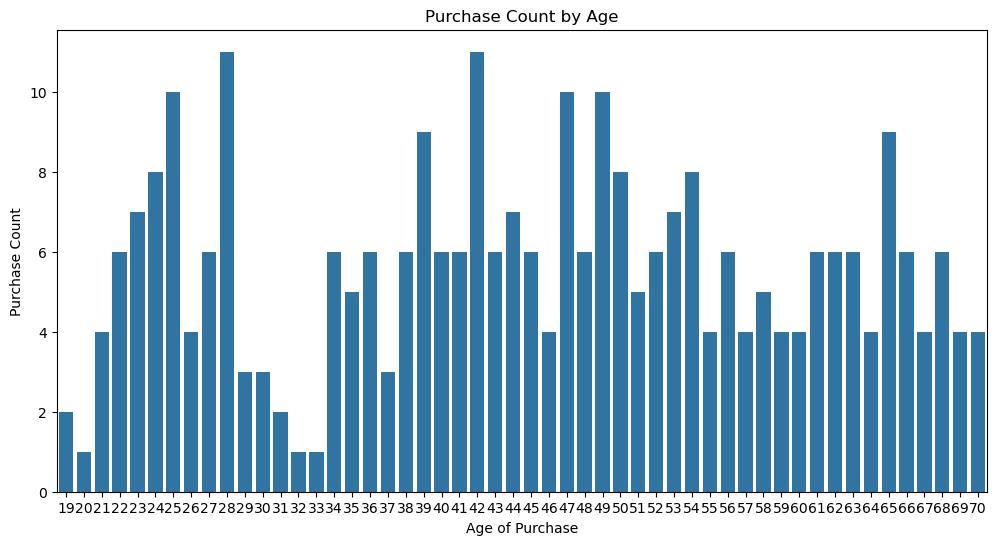

In [97]:
# 구매 당시 나이별 구매 횟수를 시각화하기
# 바 플롯으로
# 20대 초반에 구매 횟수가 가장 많음
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x="구매 당시 나이")
plt.xlabel("Age of Purchase")
plt.ylabel("Purchase Count")
plt.title("Purchase Count by Age")
plt.show()

In [ ]:
# 잠재적인 고객층

# 20대 중후반에 구매 횟수가 가장 많음
# 40대 중반에도 구매 횟수가 증가하는 경향성
# 60대 중반에 구매 횟수 소폭 상승

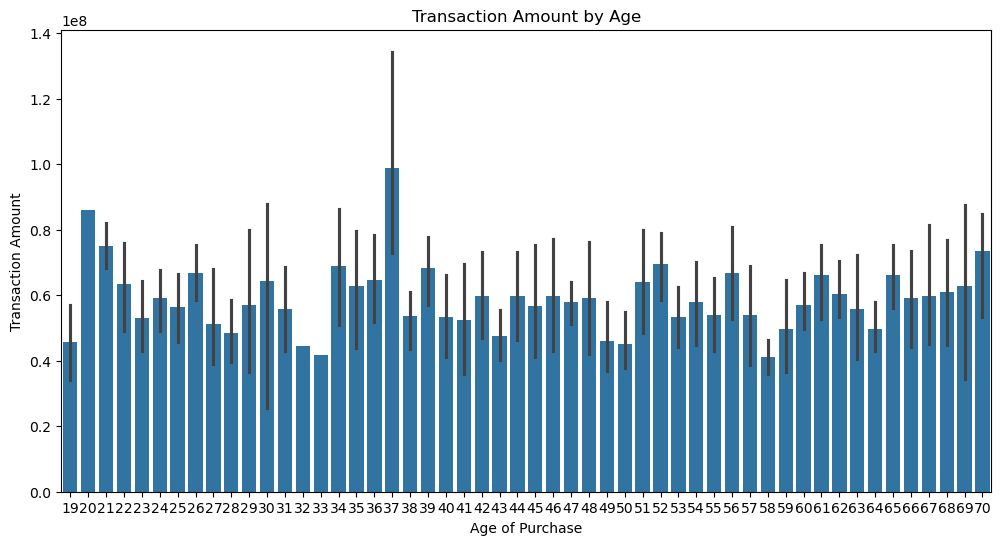

In [99]:
# 구매 당시 나이별 구매 금액을 시각화하기
# 바 플롯으로
plt.figure(figsize=(12, 6))
sb.barplot(data=df, x="구매 당시 나이", y="거래 금액 (Transaction Amount)")
plt.xlabel("Age of Purchase")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount by Age")
plt.show()

In [100]:
# 30대 중반에 구매 금액이 가장 많음

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) D

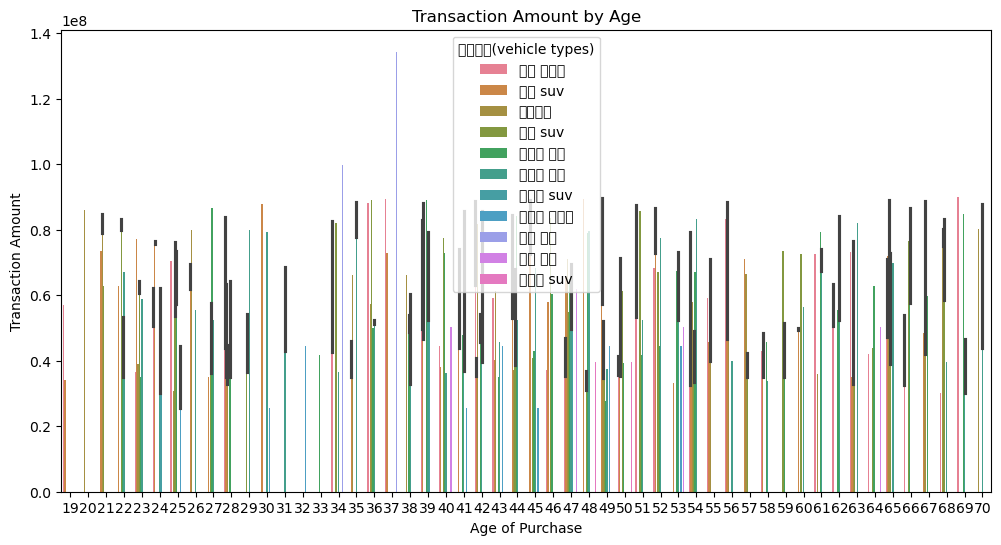

In [101]:
# 구매 당시 나이별 구매 횟수와 구매 금액을 시각화하기
# 바 플롯으로
plt.figure(figsize=(12, 6))
sb.barplot(data=df, x="구매 당시 나이", y="거래 금액 (Transaction Amount)", hue="차량구분(vehicle types)")
plt.xlabel("Age of Purchase")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount by Age")
plt.show()

In [60]:
df.to_csv("data/고객db_전처리.csv", index=False)